## Iniciando a Análise de Série Temporal

In [1]:
#Importando a biblioteca
import pandas as pd

#Lendo a base de dados
url = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv"

dados = pd.read_csv(url, encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=16, engine="python")
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [2]:
#Deletando a coluna e a linha "Total"
dados.drop("Total", axis = 1, inplace=True)
dados.drop(19, inplace=True)

In [3]:
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [4]:
#Usando o método melt
dados_st = dados.melt(id_vars="Ano Diagnóstico", value_name="Casos", var_name="Mês")
dados_st

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [5]:
#Criando a coluna "Data"
dados_st["Data"] = dados_st["Ano Diagnóstico"]+"-"+dados_st["Mês"]
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


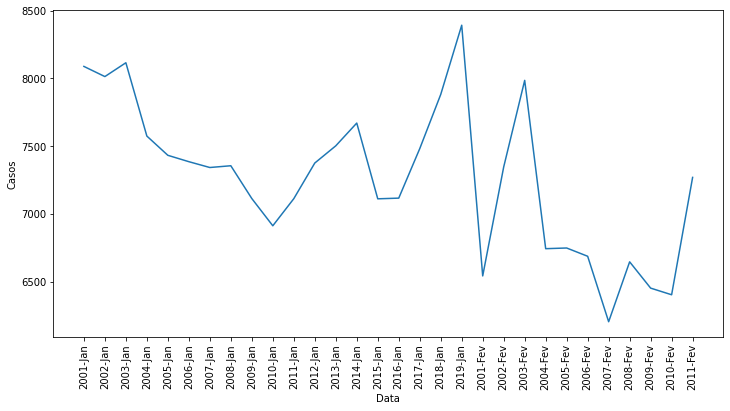

In [6]:
#Importando as bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

#Plotando a série temporal
plt.figure(figsize=(12,6))
sns.lineplot(x="Data", y="Casos", data=dados_st[:30])

#Formatando o gráfico
plt.xticks(rotation = 90)

plt.show()

In [7]:
#Obtendo informações sobre o DataFrame
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    object
 1   Mês              228 non-null    object
 2   Casos            228 non-null    int64 
 3   Data             228 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.2+ KB


In [8]:
#Criando um dicionário dos meses
meses_port_ing = {
    "Jan": "Jan",
    "Fev": "Feb",
    "Mar": "Mar",
    "Abr": "Apr",
    "Mai": "May",
    "Jun": "Jun",
    "Jul": "Jul",
    "Ago": "Aug",
    "Set": "Sep",
    "Out": "Oct",
    "Nov": "Nov",
    "Dez": "Dec"
}

dados_st["Mês"] = dados_st["Mês"].map(meses_port_ing)
dados_st.sample(5)

,Ano Diagnóstico,Mês,Casos,Data
214,2006,Dec,6151,2006-Dez
186,2016,Oct,6588,2016-Out
76,2001,May,7656,2001-Mai
127,2014,Jul,7516,2014-Jul
15,2016,Jan,7116,2016-Jan


In [9]:
#Atualizando a coluna "Data"
dados_st["Data"] = dados_st["Ano Diagnóstico"]+"-"+dados_st["Mês"]
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dec
224,2016,Dec,6672,2016-Dec
225,2017,Dec,7020,2017-Dec
226,2018,Dec,6900,2018-Dec


In [10]:
#Transformando a string em data
dados_st["Data"] = pd.to_datetime(dados_st["Data"])
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-01-01
1,2002,Jan,8013,2002-01-01
2,2003,Jan,8115,2003-01-01
3,2004,Jan,7574,2004-01-01
4,2005,Jan,7432,2005-01-01
...,...,...,...,...
223,2015,Dec,6844,2015-12-01
224,2016,Dec,6672,2016-12-01
225,2017,Dec,7020,2017-12-01
226,2018,Dec,6900,2018-12-01


In [11]:
#Obtendo informações sobre o DataFrame
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    object        
 1   Mês              228 non-null    object        
 2   Casos            228 non-null    int64         
 3   Data             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.2+ KB


In [12]:
#Selecionando as colunas de interesse
dados_st = dados_st[["Data", "Casos"]]
dados_st

,Data,Casos
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432
...,...,...
223,2015-12-01,6844
224,2016-12-01,6672
225,2017-12-01,7020
226,2018-12-01,6900


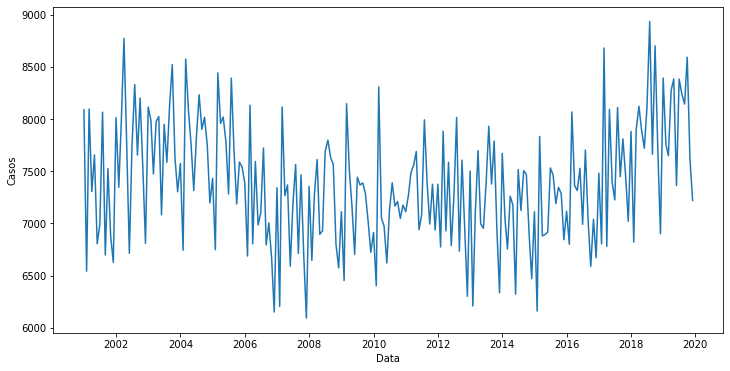

In [13]:
#Plotando o gráfico
plt.figure(figsize=(12,6))
sns.lineplot(x="Data", y="Casos", data=dados_st)

#Formatando o gráfico
plt.xticks(rotation = 0)

plt.show()

### Super Desafio: Pesquisar o que é espectro de frequência

In [14]:
#Ordenando os dados pela data e resetando o índice
dados_st.sort_values(by=["Data"], inplace=True)
dados_st.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


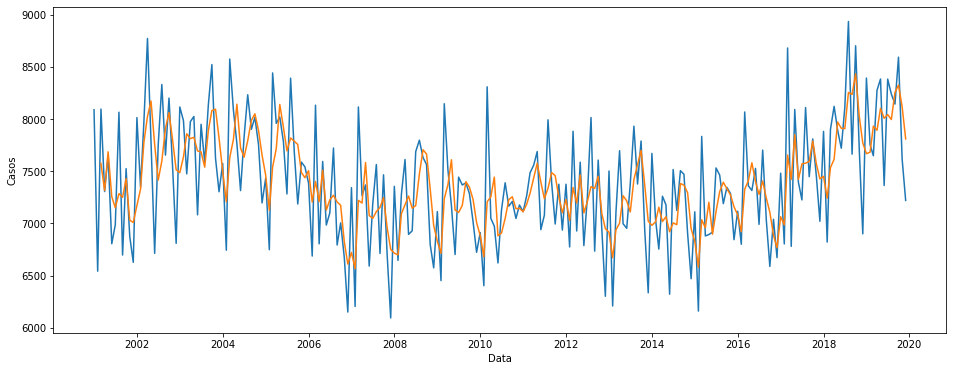

In [15]:
#Calculando a média móvel
#rolling: janela de tempo
dados_st["Media_Movel_3"] = dados_st["Casos"].rolling(3).mean()

#Plotando o gráfico
plt.figure(figsize=(16,6))
sns.lineplot(x="Data", y="Casos", data=dados_st)
sns.lineplot(x="Data", y="Media_Movel_3", data=dados_st)

#Formatando o gráfico
plt.xticks(rotation = 0)

plt.show()

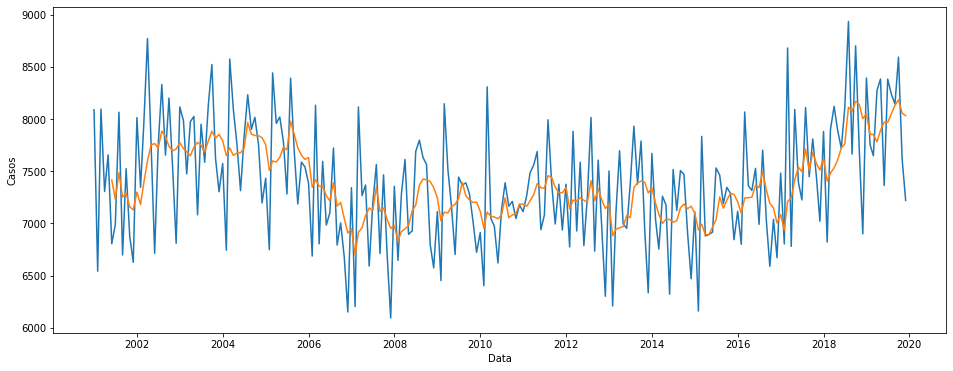

In [16]:
#Calculando a média móvel
dados_st["Media_Movel_6"] = dados_st["Casos"].rolling(6).mean()

#Plotando o gráfico
plt.figure(figsize=(16,6))
sns.lineplot(x="Data", y="Casos", data=dados_st)
sns.lineplot(x="Data", y="Media_Movel_6", data=dados_st)

#Formatando o gráfico
plt.xticks(rotation = 0)

plt.show()

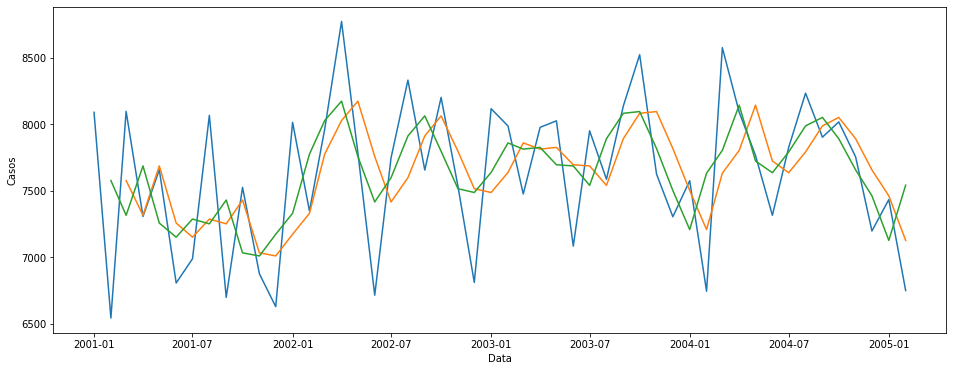

In [17]:
#Calculando a média móvel centrada
dados_st["Media_Movel_3c"] = dados_st["Casos"].rolling(3, center=True).mean()

#Plotando o gráfico
plt.figure(figsize=(16,6))
sns.lineplot(x="Data", y="Casos", data=dados_st[:50])
sns.lineplot(x="Data", y="Media_Movel_3", data=dados_st[:50])
sns.lineplot(x="Data", y="Media_Movel_3c", data=dados_st[:50])

#Formatando o gráfico
plt.xticks(rotation = 0)

plt.show()

### HANSENÍASE

In [18]:
#Lendo a base de dados
url = "https://raw.githubusercontent.com/claricefiorese/bootcamp_alura_aulas/main/hanseniase_ano_mes_diagnostico.csv"

dados_h = pd.read_csv(url, encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=10, engine="python")
dados_h.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,<1975,28,8,12,14,14,17,17,14,12,23,21,21,201
1,1975,-,1,-,-,-,-,-,-,-,-,-,1,2
2,1976,-,-,-,2,1,2,-,-,2,-,1,-,8
3,1977,2,-,-,1,-,-,-,-,-,1,1,-,5
4,1978,-,-,-,-,-,2,1,2,-,1,-,-,6


In [19]:
#Selecionando as linhas de interesse
dados_h = dados_h[27:]

In [20]:
#Deletando a coluna e a linha "Total"
dados_h.drop("Total", axis = 1, inplace=True)
dados_h.drop(46, inplace=True)

In [21]:
dados_h.reset_index(drop=True)

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,4107,4103,4787,4135,4724,3940,4116,4890,4035,4728,4197,3250
1,2002,3982,4065,4566,5027,4663,4488,4971,5281,4805,5151,4679,3545
2,2003,4127,5918,5555,4965,5013,4476,4655,4844,5249,5257,4737,3874
3,2004,4168,4169,5612,4557,5440,5299,4975,5640,4825,4233,4520,3925
4,2005,4078,4241,4998,4628,4706,4559,4154,5457,4853,5196,5008,4209
5,2006,4448,4520,5168,3865,4488,3868,3937,4868,4012,4289,4206,3399
6,2007,3999,3747,4708,3740,4161,3621,3959,4482,3810,4456,3849,3234
7,2008,3712,3642,3781,4246,3635,3938,4498,4772,4472,4059,3716,3052
8,2009,3489,3875,4584,3625,3786,3562,3813,4070,3775,3598,3750,2950
9,2010,3199,3340,4254,3548,3969,3333,3370,3947,3522,3490,3605,2928


In [22]:
#Usando o método melt
dados_hanseniase = dados_h.melt(id_vars="Ano Diagnóstico", value_name="Casos", var_name="Mês")

In [23]:
#Criando a coluna "Data"
dados_hanseniase["Data"] = dados_hanseniase[["Ano Diagnóstico", "Mês"]].agg("-".join, axis=1)

In [24]:
#Convertendo o número de casos para int
dados_hanseniase["Casos"] = dados_hanseniase["Casos"].astype("int64")

In [25]:
#Transformando a string em data
from datetime import date

#Criando um dicionário dos meses
meses = {
    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)

dados_hanseniase["Data"] = dados_hanseniase["Data"].map(para_dia) #Mapear cada um dos valores do índice de acordo com a função "para_dia"
dados_hanseniase["Data"]

0      2001-01-01
1      2002-01-01
2      2003-01-01
3      2004-01-01
4      2005-01-01
          ...    
223    2015-12-01
224    2016-12-01
225    2017-12-01
226    2018-12-01
227    2019-12-01
Name: Data, Length: 228, dtype: object

In [26]:
#Selecionando as colunas de interesse
dados_hanseniase = dados_hanseniase[["Data", "Casos"]]

### Desafio 01: Analisar outras janelas para média móvel


In [27]:
def plota_media_movel(dados: pd.DataFrame, janela: int, centrada: bool=True):
  
  #Calculando a média móvel
  dados[f"Media_Movel_{str(janela)}"] = dados["Casos"].rolling(janela).mean()                                            
  dados[f"Media_Movel_{str(janela)}c"] = dados["Casos"].rolling(janela,center=centrada).mean()

  #Plotando o gráfico
  plt.figure(figsize=(16,6))
  sns.lineplot(data=dados, x="Data", y="Casos")
  sns.lineplot(data=dados, x="Data", y=f"Media_Movel_{str(janela)}")
  sns.lineplot(data=dados, x="Data", y=f"Media_Movel_{str(janela)}c")

  #Formatando o gráfico
  plt.legend(["Número de casos", f"Média Móvel ({str(janela)} meses)", f"Média Móvel Centrada ({str(janela)} meses)"])

  plt.show()

>Tuberculose

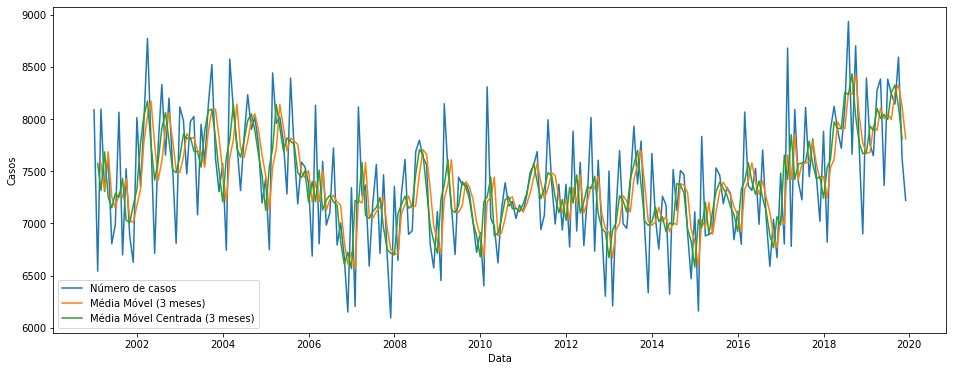

In [28]:
plota_media_movel(dados_st, 3)

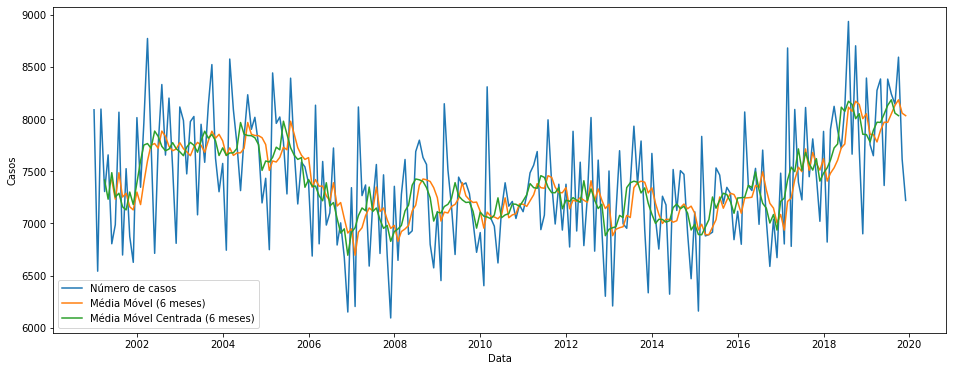

In [29]:
plota_media_movel(dados_st, 6)

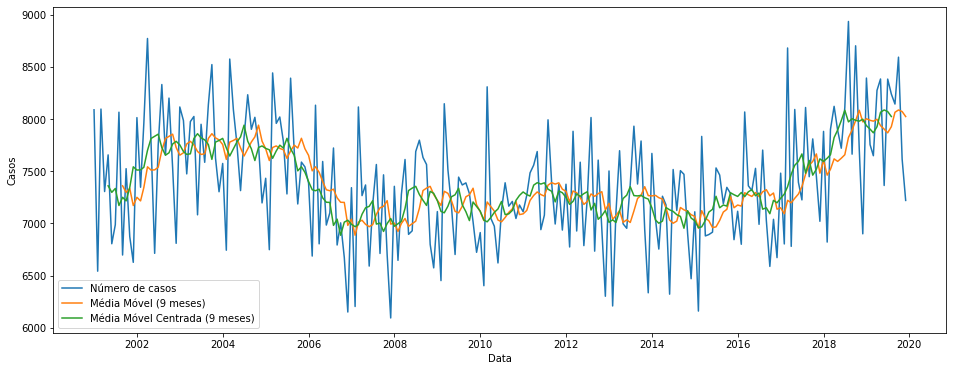

In [30]:
plota_media_movel(dados_st, 9)

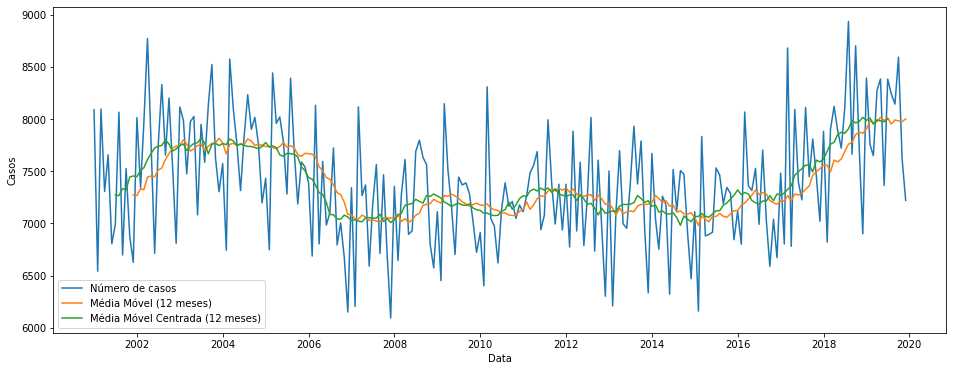

In [31]:
plota_media_movel(dados_st, 12)

>Hanseníase

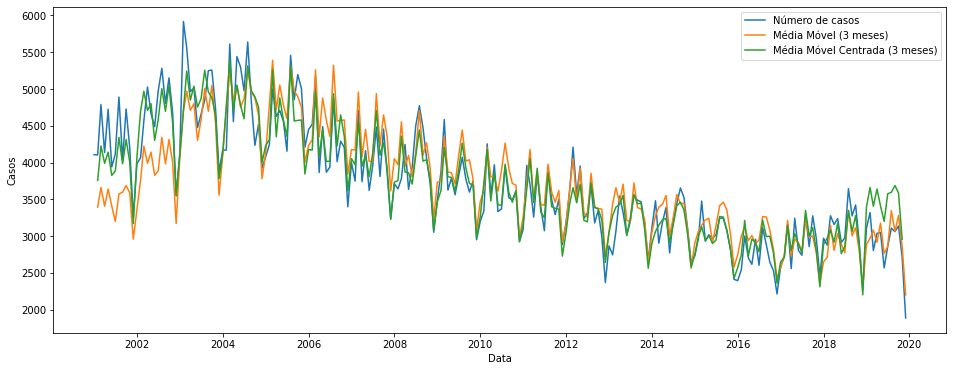

In [32]:
plota_media_movel(dados_hanseniase, 3)

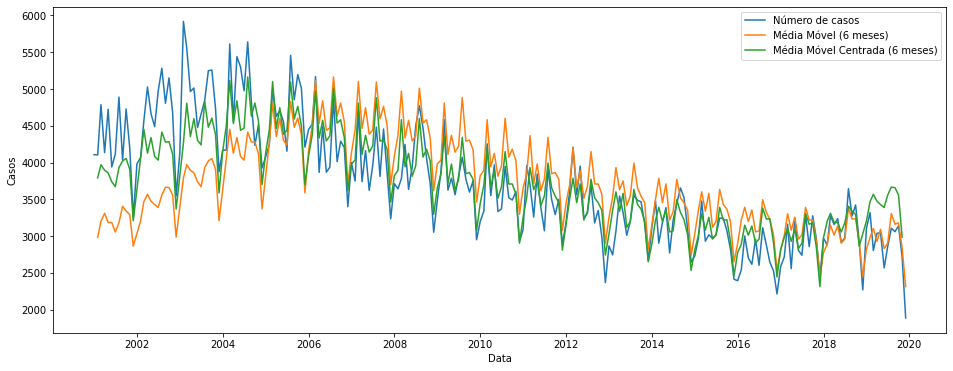

In [33]:
plota_media_movel(dados_hanseniase, 6)

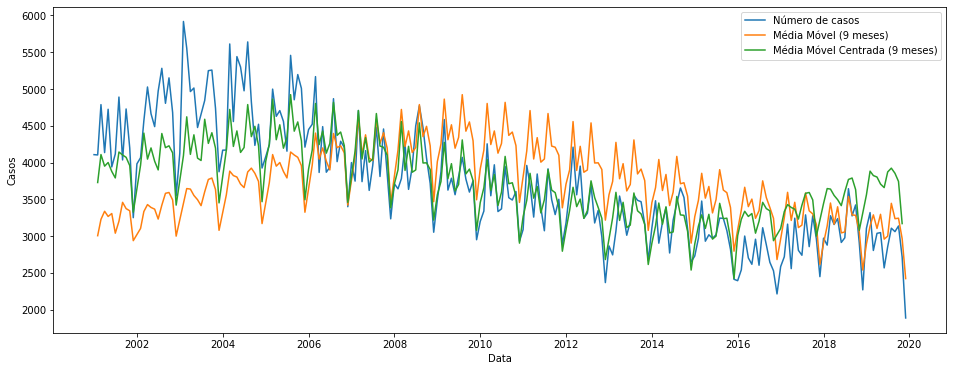

In [34]:
plota_media_movel(dados_hanseniase, 9)

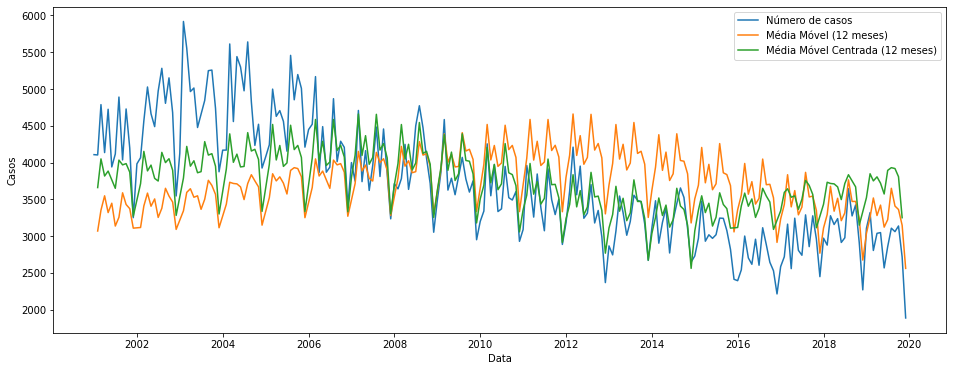

In [35]:
plota_media_movel(dados_hanseniase, 12)

### Desafio 02: Realizar sua primeira previsão utilizando médias (toda série, 3 últimos meses)

In [49]:
dados_st.head()

,Data,Casos,Media_Movel_3,Media_Movel_6,Media_Movel_3c,Media_Movel_6c,Media_Movel_9,Media_Movel_9c,Media_Movel_12,Media_Movel_12c
0,2001-01-01,8088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-02-01,6542,NaN,NaN,7575.000000,NaN,NaN,NaN,NaN,NaN
2,2001-03-01,8095,7575.000000,NaN,7314.000000,NaN,NaN,NaN,NaN,NaN
3,2001-04-01,7305,7314.000000,NaN,7685.333333,7415.166667,NaN,NaN,NaN,NaN
4,2001-05-01,7656,7685.333333,NaN,7255.333333,7231.666667,NaN,7360.0,NaN,NaN


In [53]:
#Exibindo os dados de 2018
dados_st[dados_st["Data"].dt.year == 2018]

,Data,Casos,Media_Movel_3,Media_Movel_6,Media_Movel_3c,Media_Movel_6c,Media_Movel_9,Media_Movel_9c,Media_Movel_12,Media_Movel_12c
204,2018-01-01,7881,7450.666667,7619.666667,7240.666667,7480.500000,7603.111111,7593.666667,7557.583333,7616.500000
205,2018-02-01,6821,7240.666667,7404.833333,7534.333333,7532.500000,7462.000000,7624.000000,7559.083333,7690.166667
206,2018-03-01,7901,7534.333333,7480.500000,7614.333333,7606.000000,7518.333333,7657.333333,7494.166667,7758.833333
207,2018-04-01,8121,7614.333333,7532.500000,7971.333333,7722.666667,7617.888889,7822.111111,7605.916667,7776.833333
208,2018-05-01,7892,7971.333333,7606.000000,7911.000000,7760.666667,7593.666667,7893.555556,7589.333333,7851.166667
209,2018-06-01,7720,7911.000000,7722.666667,7907.000000,8112.833333,7624.000000,7984.666667,7616.500000,7872.833333
210,2018-07-01,8109,7907.000000,7760.666667,8254.333333,8073.166667,7657.333333,8083.555556,7690.166667,7862.833333
211,2018-08-01,8934,8254.333333,8112.833333,8235.333333,8169.833333,7822.111111,7972.333333,7758.833333,7905.416667
212,2018-09-01,7663,8235.333333,8073.166667,8432.666667,8139.666667,7893.555556,8002.444444,7776.833333,7983.166667
213,2018-10-01,8701,8432.666667,8169.833333,8025.000000,8003.000000,7984.666667,7987.111111,7851.166667,7962.083333


In [54]:
#Calculando a média móvel dos casos de 2018
dados_2018_media_3 = dados_st[["Data", "Casos"]].rolling(3).mean(numeric_only=True).iloc[204:216]
dados_2018_media_3

,Casos
204,7450.666667
205,7240.666667
206,7534.333333
207,7614.333333
208,7971.333333
209,7911.000000
210,7907.000000
211,8254.333333
212,8235.333333
213,8432.666667


In [55]:
#Exibindo os dados de 2019
dados_st[dados_st["Data"].dt.year == 2019]

,Data,Casos,Media_Movel_3,Media_Movel_6,Media_Movel_3c,Media_Movel_6c,Media_Movel_9,Media_Movel_9c,Media_Movel_12,Media_Movel_12c
216,2019-01-01,8392,7667.666667,8050.166667,7682.000000,7851.000000,8002.444444,7936.222222,7905.416667,7986.000000
217,2019-02-01,7754,7682.000000,7853.500000,7931.333333,7779.833333,7987.111111,7902.888889,7983.166667,8008.750000
218,2019-03-01,7648,7931.333333,7851.000000,7892.000000,7891.833333,7979.111111,7867.444444,7962.083333,7950.833333
219,2019-04-01,8274,7892.000000,7779.833333,8101.666667,7969.000000,7997.444444,7926.111111,7974.833333,7990.833333
220,2019-05-01,8383,8101.666667,7891.833333,8006.666667,7967.333333,7936.222222,8064.222222,8015.750000,7981.750000
221,2019-06-01,7363,8006.666667,7969.000000,8042.666667,8048.166667,7902.888889,8086.444444,7986.000000,7973.750000
222,2019-07-01,8382,8042.666667,7967.333333,7994.666667,8130.666667,7867.444444,8071.000000,8008.750000,8000.416667
223,2019-08-01,8239,7994.666667,8048.166667,8254.666667,8183.666667,7926.111111,8023.444444,7950.833333,NaN
224,2019-09-01,8143,8254.666667,8130.666667,8324.666667,8055.666667,8064.222222,NaN,7990.833333,NaN
225,2019-10-01,8592,8324.666667,8183.666667,8116.666667,8031.833333,8086.444444,NaN,7981.750000,NaN


In [65]:
#Atribuindo a média móvel dos casos de 2018 aos meses de 2019
dados_2018_media_3["Data"] = dados_st[216:228]["Data"].to_list()
dados_2018_media_3

,Casos,Data
204,7450.666667,2019-01-01
205,7240.666667,2019-02-01
206,7534.333333,2019-03-01
207,7614.333333,2019-04-01
208,7971.333333,2019-05-01
209,7911.000000,2019-06-01
210,7907.000000,2019-07-01
211,8254.333333,2019-08-01
212,8235.333333,2019-09-01
213,8432.666667,2019-10-01


In [57]:
#Calculando a média da previsão de casos de 2018
media_ano_2018 = dados_st[["Data", "Casos"]].iloc[204:216].mean(numeric_only=True)
media_ano_2018

Casos    7862.833333
dtype: float64

In [60]:
#Adicionando a coluna com o valor da média da previsão de casos de 2018 ao dataset
dados_st["Previsao_Media_2003"] = [media_ano_2018[0] for _ in range(len(dados_st))]

In [61]:
dados_st.head()

,Data,Casos,Media_Movel_3,Media_Movel_6,Media_Movel_3c,Media_Movel_6c,Media_Movel_9,Media_Movel_9c,Media_Movel_12,Media_Movel_12c,Previsao_Media_2003
0,2001-01-01,8088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7862.833333
1,2001-02-01,6542,NaN,NaN,7575.000000,NaN,NaN,NaN,NaN,NaN,7862.833333
2,2001-03-01,8095,7575.000000,NaN,7314.000000,NaN,NaN,NaN,NaN,NaN,7862.833333
3,2001-04-01,7305,7314.000000,NaN,7685.333333,7415.166667,NaN,NaN,NaN,NaN,7862.833333
4,2001-05-01,7656,7685.333333,NaN,7255.333333,7231.666667,NaN,7360.0,NaN,NaN,7862.833333


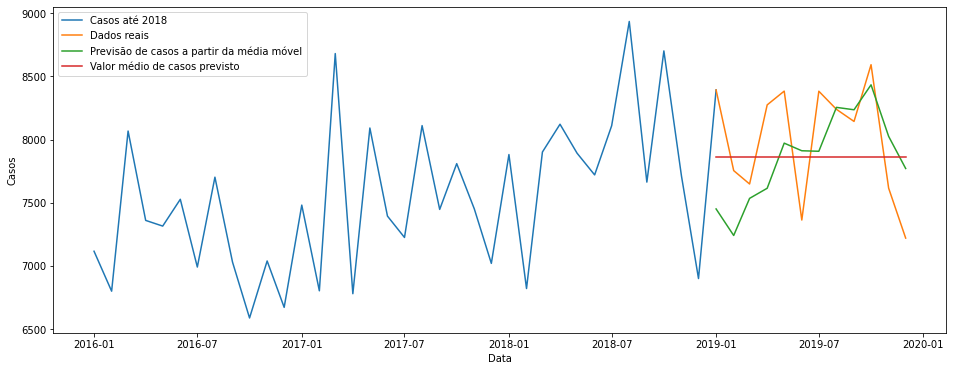

In [71]:
#Plotando o gráfico
plt.figure(figsize=(16,6))
sns.lineplot(x="Data", y="Casos", data=dados_st[180:217], label="Casos a partir de 2016")
sns.lineplot(x="Data", y="Casos", data=dados_st[216:228], label="Dados reais em 2019")
sns.lineplot(x="Data", y="Casos", data=dados_2018_media_3, label="Previsão de casos a partir da média móvel")
sns.lineplot(x="Data", y="Previsao_Media_2003", data=dados_st[216:228], label="Valor médio de casos previsto")

#Formatando o gráfico
plt.xticks(rotation = 0)

plt.show()